In [46]:
from sirf.STIR import (ImageData, AcquisitionData,
                       SPECTUBMatrix, AcquisitionModelUsingMatrix,
                       MessageRedirector,)
from simind import *
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

msg = MessageRedirector()
AcquisitionData.set_storage_scheme('memory')

In [47]:
# SIMIND parameters
total_activity = 187 # MBq
time_per_projection = 20  # seconds
photon_multiplier = 10 # EXPLAIN (tiny)
photopeak_energy = 150  # keV
window_lower = 75 # keV
window_upper = 225 # keV
source_type = "y90" 
collimator = 'ma-megp'
kev_per_channel = 5
num_energy_spectra_channels = 400 # EXPLAIN better

In [48]:
image = ImageData("/home/sam/data/phantom_data/SPECT/ellipsoid_image_s.hv")
mu_map = ImageData("/home/sam/data/phantom_data/SPECT/umap_zoomed.hv")
measured_data = AcquisitionData("/home/sam/data/phantom_data/SPECT/peak_1_projdata__f1g1d0b0.hs")

In [49]:
mu_map_stir = mu_map.clone()
mu_map_stir.fill(np.flip(mu_map.as_array(), axis=2))

In [50]:
simulator = SimindSimulator(input_filepath=".", output_filepath=".",)
attributes = {"SourceMap": image,
              "MuMap": mu_map,
              "keVPerChannel": kev_per_channel, 
              'NumberOfEnergySpectraChannels': num_energy_spectra_channels,
              "PhotopeakEnergy": photopeak_energy,
              "SourceActivity": total_activity,
              "PhotonMultiplier": photon_multiplier,
              "ImageDurationPerProjection": time_per_projection,
              "SourceType": source_type.lower(),
              "Collimator": collimator,}
simulator.set_template_sinogram(measured_data)
simulator.set_attributes(attributes)
simulator.set_windows(window_lower, window_upper, 0)

deleting tmp_7_1722860323173.hs failed, please delete manually


In [51]:
simulator.run_simulation()

Clearing all files in . that could cause trouble...
This includes:
 - .h00, .hs, .a00, .hct, .ict, .bis, .res
if this is not what you want, please cancel this process now.
5
4
3
2
1
removed output_air_w1.a00
removed tmp_9_1722861096221.hs
removed output.res
removed output_air_w1.h00
removed output_tot_w1.h00
removed output.bis
removed output_tot_w1.hs
removed output_sca_w1.h00
removed tmp_10_1722861531874.hs
removed tmp_adjus_adjusted.h00
removed tmp_8_1722861088631.hs
removed output_sca_w2.h00
removed tmp.hs
removed output_sca_w2.hs
removed output_sca_w2.a00
removed output_tot_w1.a00
removed output_sca_w1.a00
removed output_air_w1.hs
removed output_sca_w1.hs
All required attributes are set and ready for simulation.
All relevant files exist in ..
symlink already exists
symlink already exists
symlink already exists
symlink already exists
symlink already exists
symlink already exists
symlink already exists
symlink already exists
symlink already exists
symlink already exists
symlink alrea

In [65]:
simind_total = simulator.get_output_total()
simind_scatter = simulator.get_output_scatter()
simind_true = simind_total - simind_scatter

simind_total.write("data/Y90/simind_total_ellipses_megp_cpd.hs")
simind_scatter.write("data/Y90/simind_scatter_ellipses_megp_cpd.hs")
simind_true.write("data/Y90/simind_true_ellipses_megp_cpd.hs")

In [53]:
acq_matrix = SPECTUBMatrix()
acq_matrix.set_attenuation_image(mu_map_stir)
acq_matrix.set_keep_all_views_in_cache(True)
acq_matrix.set_resolution_model(1.81534, 0.02148, False)
acq_model = AcquisitionModelUsingMatrix(acq_matrix)
acq_model.set_up(measured_data, image)


INFO: Setting attenuation type to 'simple'

INFO: 2D PSF Correction. Parallel geometry

Parameters of SPECT UB matrix: (in cm)
Image grid side row: 128	col: 128	transverse voxel_size: 0.42578
Number of slices: 128	slice_thickness: 0.42578
Number of bins: 128	bin size: 0.42578	axial size: 0.42578
Number of angles: 120	Angle increment: 3	First angle: 360
Number of subsets: 120
Correction for attenuation: 		do_msk_att: 0
Attenuation map: 
Rotation radii: {26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26

In [54]:
stir_forward_projection = acq_model.forward(image)


INFO: Computing matrix elements for view 3

INFO: total number of non-zero weights in this view: 16178176, estimated size: 155.85 MB

INFO: Weight matrix calculation done. time 0.91 (s)

INFO: Total time after transfering to ProjMatrixElemsForOneBin. time 1.03 (s)

INFO: Computing matrix elements for view 0

INFO: total number of non-zero weights in this view: 16490240, estimated size: 158.826 MB

INFO: Weight matrix calculation done. time 0.84 (s)

INFO: Total time after transfering to ProjMatrixElemsForOneBin. time 0.94 (s)

INFO: Computing matrix elements for view 5

INFO: total number of non-zero weights in this view: 15878272, estimated size: 152.99 MB

INFO: Weight matrix calculation done. time 0.77 (s)

INFO: Total time after transfering to ProjMatrixElemsForOneBin. time 0.87 (s)

INFO: Computing matrix elements for view 11

INFO: total number of non-zero weights in this view: 15341952, estimated size: 147.875 MB

INFO: Weight matrix calculation done. time 0.76 (s)

INFO: Total

In [55]:
scaling_factor_stir = stir_forward_projection.sum()/simind_true.sum()
scaling_factor_measured = measured_data.sum()/simind_total.sum()

scaling_factor = scaling_factor_measured

In [56]:
print(f"stir scaling factor: {scaling_factor_stir}")
print(f"measured scaling factor: {scaling_factor_measured}")

stir scaling factor: 0.0033827328588813543
measured scaling factor: 0.6550671458244324


In [57]:
print(f"simind unnormalised total counts: {simind_total.sum()}")
print(f"simind unnormalised true counts: {simind_true.sum()}")
print(f"simind unnormalised scatter counts: {simind_scatter.sum()}")
print("\n")
print(f"simind normalised total counts: {simind_total.sum()*scaling_factor}")
print(f"simind normalised true counts: {simind_true.sum()*scaling_factor}")
print(f"simind normalised scatter counts: {simind_scatter.sum()*scaling_factor}")
print("\n")
print(f"measured total counts: {measured_data.sum()}")
print(f"stir total counts: {stir_forward_projection.sum()}")

simind unnormalised total counts: 6320600.5


simind unnormalised true counts: 3575109.25
simind unnormalised scatter counts: 2745491.25


simind normalised total counts: 4140417.75
simind normalised true counts: 2341936.5
simind normalised scatter counts: 1798481.125


measured total counts: 4140417.75
stir total counts: 12093.6396484375


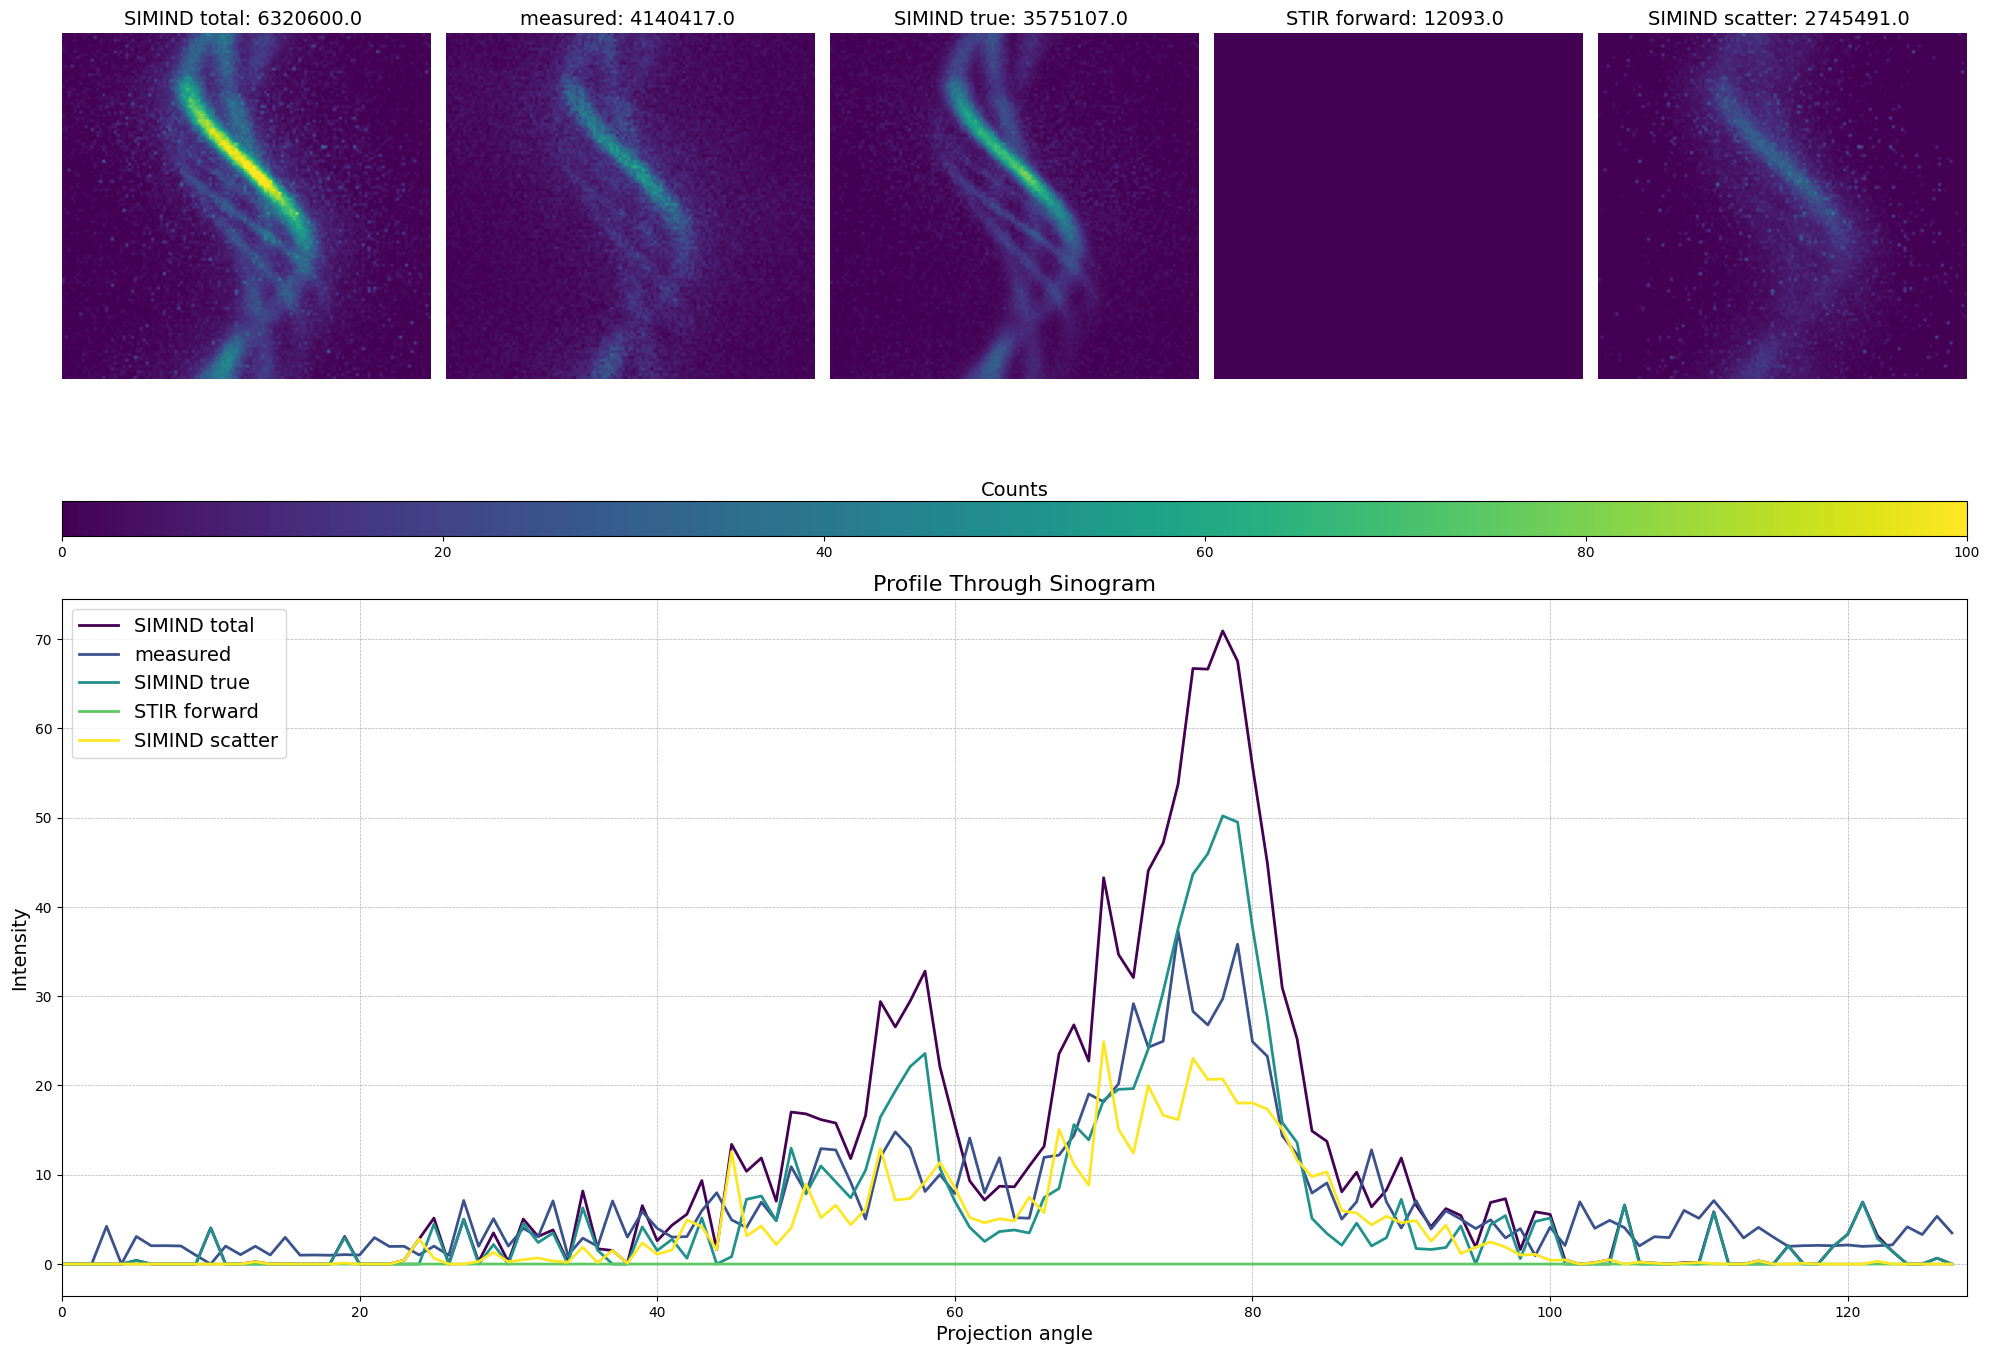

In [64]:
# Define consistent font size and colormap
font_size = 14
colormap = 'viridis'
axial_slice = 55

# Set the maximum intensity for color normalization
vmax = 100#max(measured_data.max(), simind_total.max(), stir_forward_projection.max())

data_list = [
    ((simind_total).as_array(), "SIMIND total"),
    (measured_data.as_array(), "measured"),
    ((simind_true).as_array(), "SIMIND true"),
    ((stir_forward_projection).as_array(), "STIR forward"),
    ((simind_scatter).as_array(), "SIMIND scatter"),
]

divisors = [1/scaling_factor_measured, 1, 1/scaling_factor_measured, 1/scaling_factor_stir, 1/scaling_factor_measured]

# Create a figure and a GridSpec with 3 rows
fig = plt.figure(figsize=(len(data_list)*4,7*2,))
gs = GridSpec(3, len(data_list), height_ratios=[2, 0.15, 3])  # Adjusted GridSpec for clarity

# Create image subplots in the first row
ax_images = [fig.add_subplot(gs[0, i]) for i in range(len(data_list))]

for i, (data, title) in enumerate(data_list):
    im = ax_images[i].imshow(data[0, axial_slice]/divisors[i], vmin=0, vmax=vmax, cmap=colormap)
    ax_images[i].set_title(f"{title}: {np.trunc(data.sum())} ", fontsize=font_size)
    ax_images[i].axis('off')

# Place a colorbar in a new row, just for the colorbar
cbar_ax = fig.add_subplot(gs[1, :])  # Spanning across the bottom of the image plots
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.02)  # Reduced padding
cbar_ax.set_xlabel('Counts', fontsize=font_size)
cbar_ax.xaxis.set_label_position('top')

# Set consistent font size and line width for the line plot
line_width = 2

# Create line plot in the third row
ax_line = fig.add_subplot(gs[2, :])  # Spanning across both columns in the third row

# Plotting
# make colours eqwually spread out with length of data_list
colours = plt.cm.viridis(np.linspace(0, 1, len(data_list)))
for i, (data, title) in enumerate(data_list):
    #ax_line.plot(data[40], label=title, linewidth=line_width, color=colours[i], linestyle='--')
    ax_line.plot(data[0, axial_slice][60]/divisors[i], linewidth=line_width, color=colours[i], linestyle='-', label=title)
    #ax_line.plot(data[90], linewidth=line_width, color=colours[i], linestyle=':')

# Enhance the appearance of the line plot
ax_line.set_xlabel('Projection angle', fontsize=font_size)
ax_line.set_ylabel('Intensity', fontsize=font_size)
ax_line.set_title(f'Profile Through Sinogram', fontsize=font_size + 2)
ax_line.grid(True, which='both', linestyle='--', linewidth=0.5)
ax_line.legend(loc='upper left', fontsize=font_size)
# et minimum and maximum values for x-axis
ax_line.set_xlim(0, 128)

# Adjust spacing and layout
plt.tight_layout()
plt.show()

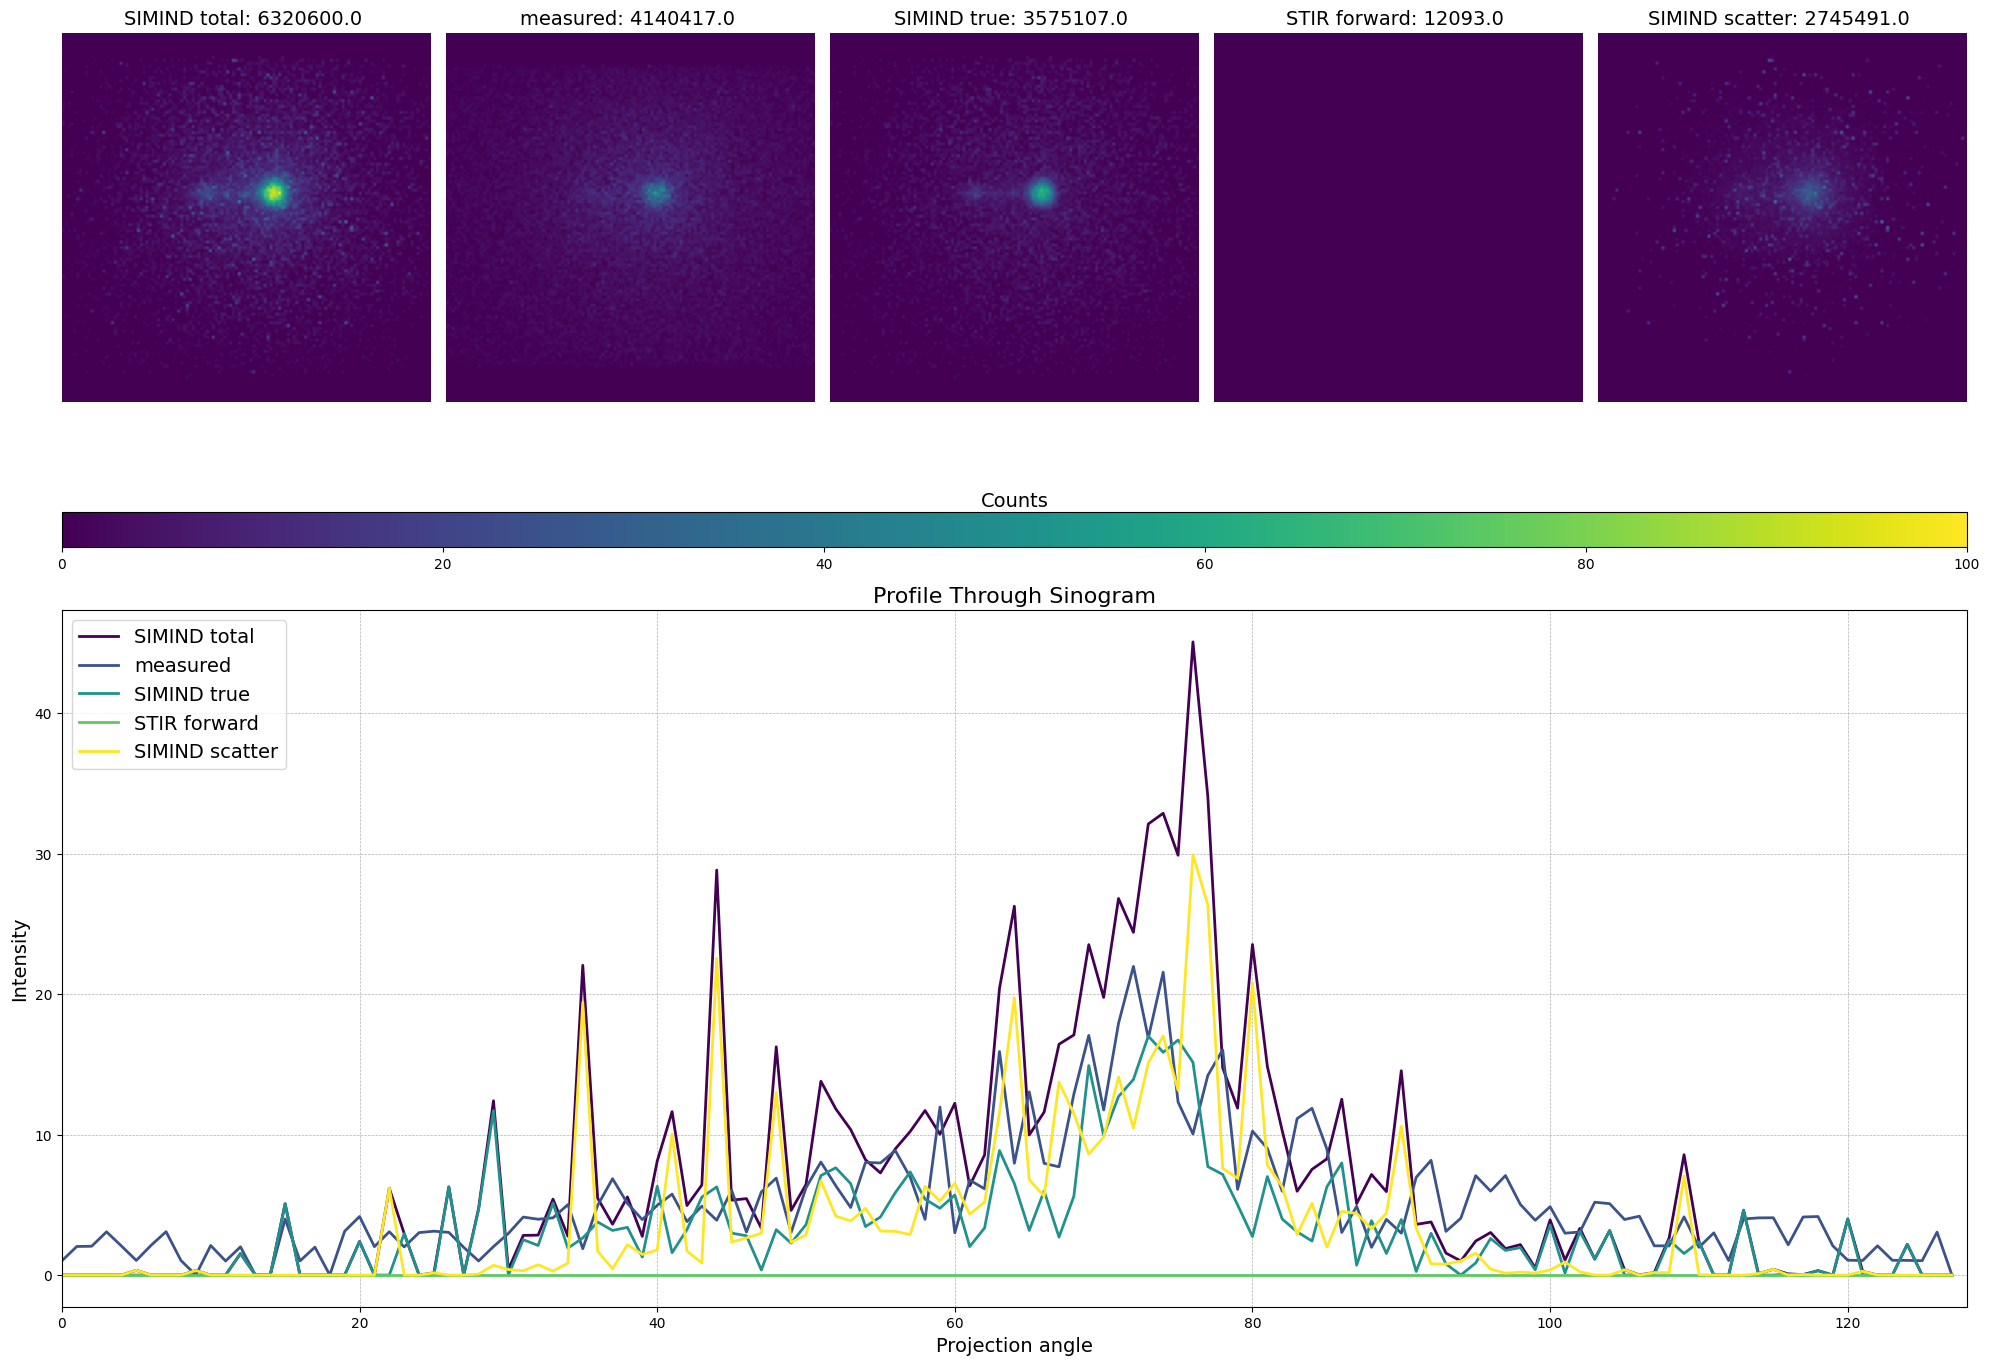

In [62]:
# Define consistent font size and colormap
font_size = 14
colormap = 'viridis'
coronal_slice = 55

# Set the maximum intensity for color normalization
vmax = 100#max(measured_data.max(), simind_total.max(), stir_forward_projection.max())

data_list = [
    ((simind_total).as_array(), "SIMIND total"),
    (measured_data.as_array(), "measured"),
    ((simind_true).as_array(), "SIMIND true"),
    ((stir_forward_projection).as_array(), "STIR forward"),
    ((simind_scatter).as_array(), "SIMIND scatter"),
]

# Create a figure and a GridSpec with 3 rows
fig = plt.figure(figsize=(len(data_list)*4,7*2,))
gs = GridSpec(3, len(data_list), height_ratios=[2, 0.15, 3])  # Adjusted GridSpec for clarity

# Create image subplots in the first row
ax_images = [fig.add_subplot(gs[0, i]) for i in range(len(data_list))]

for i, (data, title) in enumerate(data_list):
    im = ax_images[i].imshow(data[0, :, coronal_slice]/divisors[i], vmin=0, vmax=vmax, cmap=colormap)
    ax_images[i].set_title(f"{title}: {np.trunc(data.sum())} ", fontsize=font_size)
    ax_images[i].axis('off')

# Place a colorbar in a new row, just for the colorbar
cbar_ax = fig.add_subplot(gs[1, :])  # Spanning across the bottom of the image plots
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.02)  # Reduced padding
cbar_ax.set_xlabel('Counts', fontsize=font_size)
cbar_ax.xaxis.set_label_position('top')

# Set consistent font size and line width for the line plot
line_width = 2

# Create line plot in the third row
ax_line = fig.add_subplot(gs[2, :])  # Spanning across both columns in the third row

# Plotting
# make colours eqwually spread out with length of data_list
colours = plt.cm.viridis(np.linspace(0, 1, len(data_list)))
for i, (data, title) in enumerate(data_list):
    #ax_line.plot(data[40], label=title, linewidth=line_width, color=colours[i], linestyle='--')
    ax_line.plot(data[0, 60, coronal_slice]/divisors[i], linewidth=line_width, color=colours[i], linestyle='-', label=title)
    #ax_line.plot(data[90], linewidth=line_width, color=colours[i], linestyle=':')

# Enhance the appearance of the line plot
ax_line.set_xlabel('Projection angle', fontsize=font_size)
ax_line.set_ylabel('Intensity', fontsize=font_size)
ax_line.set_title(f'Profile Through Sinogram', fontsize=font_size + 2)
ax_line.grid(True, which='both', linestyle='--', linewidth=0.5)
ax_line.legend(loc='upper left', fontsize=font_size)
# et minimum and maximum values for x-axis
ax_line.set_xlim(0, 128)

# Adjust spacing and layout
plt.tight_layout()
plt.show()